In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycountry import countries
import missingno as msno

In [29]:
#World Bank Bulk indicator data
data_dir = '.\\..\\data\\'
pickle_out_file = 'cleaned_data.pkl'
tableau_out_file = 'tableau_WDI_data.csv'
tableau_map_out_file = 'tableau_map_data.csv'
world_bank_file_input = "world_bank_bulk_data.pkl"
wb_data = pd.read_pickle(data_dir + world_bank_file_input)

In [137]:
#Instead if we want to read data obtained from the API
#data_dir = '.\\..\\data\\'
#world_bank_file_input = "world_bank_api_data.pkl"
#wb_data = pd.read_pickle(data_dir + world_bank_file_input)

In [3]:
wb_data.head()

Indicator Code    EG.CFT.ACCS.ZS  EG.ELC.ACCS.ZS  EG.ELC.ACCS.RU.ZS  \
Country     Year                                                      
Afghanistan 1972             NaN             NaN                NaN   
            1973             NaN             NaN                NaN   
            1974             NaN             NaN                NaN   
            1975             NaN             NaN                NaN   
            1976             NaN             NaN                NaN   

Indicator Code    EG.ELC.ACCS.UR.ZS  FX.OWN.TOTL.ZS  FX.OWN.TOTL.FE.ZS  \
Country     Year                                                         
Afghanistan 1972                NaN             NaN                NaN   
            1973                NaN             NaN                NaN   
            1974                NaN             NaN                NaN   
            1975                NaN             NaN                NaN   
            1976                NaN             NaN                NaN   

Indicator Code    FX.OWN.TOTL.MA.ZS  FX.OWN.TOTL.OL.ZS  FX.OWN.TOTL.40.ZS  \
Country     Year                                                            
Afghanistan 1972                NaN                NaN                NaN   
            1973                NaN                NaN                NaN   
            1974                NaN                NaN                NaN   
            1975                NaN                NaN                NaN   
            1976                NaN                NaN                NaN   

Indicator Code    FX.OWN.TOTL.PL.ZS  ...  CM.MKT.INDX.ZG  SI.SPR.PC40  \
Country     Year                     ...                                
Afghanistan 1972                NaN  ...             NaN          NaN   
            1973                NaN  ...             NaN          NaN   
            1974                NaN  ...             NaN          NaN   
            1975                NaN  ...             NaN          NaN   
            1976                NaN  ...             NaN          NaN   

Indicator Code    SI.SPR.PCAP  DC.ODA.TLDC.GN.ZS  DC.ODA.TLDC.CD  \
Country     Year                                                   
Afghanistan 1972          NaN                NaN             NaN   
            1973          NaN                NaN             NaN   
            1974          NaN                NaN             NaN   
            1975          NaN                NaN             NaN   
            1976          NaN                NaN             NaN   

Indicator Code    DC.ODA.TOTL.GN.ZS  DC.ODA.TOTL.KD  DC.ODA.TOTL.CD  \
Country     Year                                                      
Afghanistan 1972                NaN             NaN             NaN   
            1973                NaN             NaN             NaN   
            1974                NaN             NaN             NaN   
            1975                NaN             NaN             NaN   
            1976                NaN             NaN             NaN   

Indicator Code    NY.GSR.NFCY.KN  SH.STA.FGMS.ZS  
Country     Year                                  
Afghanistan 1972             NaN             NaN  
            1973             NaN             NaN  
            1974             NaN             NaN  
            1975             NaN             NaN  
            1976             NaN             NaN  

[5 rows x 1594 columns]

In [4]:
target_year = 2010
target = 'SI.POV.DDAY'

#Create list of valid countries taken from the pycountry library
#This gives us a list of 249 countries that we will focus on
countries_list = []
for country in countries:
    countries_list.append(country.name)

*Let's have a look at regions that are used in the world bank data that are not in the pycountry list:*

In [5]:
exclude_list = [wb_country for wb_country in wb_data.index.levels[0].values if wb_country not in countries_list]
print(exclude_list)

['Arab World', 'Bahamas, The', 'Bolivia', 'British Virgin Islands', 'Caribbean small states', 'Central Europe and the Baltics', 'Channel Islands', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Curacao', 'Czech Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'Egypt, Arab Rep.', 'Eswatini', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)', 'European Union', 'Fragile and conflict affected situations', 'Gambia, The', 'Heavily indebted poor countries (HIPC)', 'High income', 'Hong Kong SAR, China', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total', 'Iran, Islamic Rep.', 'Korea, Dem. People’s Rep.', 'Korea, Rep.', 'Kosovo', 'Kyrgyz Republic', 'Lao PDR', 'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Latin Americ

*Clearly, some of the regions in the list above seem to be countries of interest so we will investigate these further now to see why that are not in the pycountry list*

To investigate:  
Bahamas, The  
Bolivia  
British Virgin Islands  
Congo, Dem. Rep.  
Congo, Rep.  
Cote d'Ivoire  
Curacao  
Czech Republic  
Egypt, Arab Rep.  
Eswatini  
Gambia, The  
Hong Kong SAR, China  
Iran, Islamic Rep.  
Korea, Dem. People’s Rep.  
Korea, Rep.  
Kosovo  
Kyrgyz Republic  
Lao PDR  
Macao SAR, China  
Micronesia, Fed. Sts.  
Moldova  
North Macedonia  
Slovak Republic  
St. Kitts and Nevis  
St. Lucia  
St. Martin (French part)  
St. Vincent and the Grenadines  
Tanzania  
Venezuela, RB  
Vietnam  
Virgin Islands (U.S.)  
West Bank and Gaza  
Yemen, Rep.  

*After a bit of investigation all of the above seem to fall into 2 categories:*

1. Countries that have different names in both lists and the name in the pycountry library is decided to be the standard for all further processing. This faciliates easy integration with other data sources in the future.
3. 'West Bank and Gaza' and 'Kosovo' are not listed in the pycountry list. I will add these to the countries_list seperately.

1. Countries that have different names in both lists and the name in the pycountry library is decided to be the standard for all further processing (most of the above)

In [6]:
countries_transform = {
'Bahamas, The'                  :'Bahamas',
'British Virgin Islands'        :'Virgin Islands, British',
'Congo, Dem. Rep.'              :'Congo, The Democratic Republic of the',
'Congo, Rep.'                   :'Congo',
'Egypt, Arab Rep.'              :'Egypt',
'Eswatini'                      :'Swaziland',
'Gambia, The'                   :'Gambia',
'Hong Kong SAR, China'          :'Hong Kong',
'Iran, Islamic Rep.'            :'Iran, Islamic Republic of',
'Korea, Dem. People’s Rep.'     :'Korea, Democratic People\'s Republic of',
'Korea, Rep.'                   :'Korea, Republic of',
'Kyrgyz Republic'               :'Kyrgyzstan',
'Lao PDR'                       :'Lao People\'s Democratic Republic',
'Macao SAR, China'              :'Macao',
'Micronesia, Fed. Sts.'         :'Micronesia, Federated States of',
'Moldova'                       :'Moldova, Republic of',
'North Macedonia'               :'Macedonia, Republic of',
'Slovak Republic'               :'Slovakia',
'St. Kitts and Nevis'           :'Saint Kitts and Nevis',
'St. Lucia'                     :'Saint Lucia',
'St. Martin (French part)'      :'Saint Martin (French part)',
'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
'Tanzania'                      :'Tanzania, United Republic of',
'Venezuela, RB'                 :'Venezuela, Bolivarian Republic of',
'Virgin Islands (U.S.)'         :'Virgin Islands, U.S.',
'Yemen, Rep.'                   :'Yemen',
'Vietnam'                       :'Viet Nam',
'Czech Republic'                :'Czechia',
'Curacao'                       :'Curaçao',
'Cote d\'Ivoire'                :'Côte d\'Ivoire',
'Bolivia'                       :'Bolivia, Plurinational State of'}
  
#Get index as a list, make changes and reapply the list to the World Bank dataframe
index_of_wb_countries = list(wb_data.index.levels[0])

for remove_region, replace_with_region in countries_transform.items():
    index_of_wb_countries[index_of_wb_countries.index(remove_region)] = replace_with_region

#reapply the index to the original dataframe
wb_data.index = wb_data.index.set_levels(index_of_wb_countries, level=0)    

2. 'West Bank and Gaza' and 'Kosovo' are not listed in the pycountry list. I will add these to the countries_list seperately.

In [7]:
add_list = ['West Bank and Gaza', 'Kosovo']

countries_list.extend(add_list)

Have another look at what regions are going to be excluded:

In [8]:
new_exclude_list = [wb_country for wb_country in wb_data.index.levels[0].values if wb_country not in countries_list]
print(new_exclude_list)

['Arab World', 'Caribbean small states', 'Central Europe and the Baltics', 'Channel Islands', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)', 'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'High income', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total', 'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Latin America & the Caribbean (IDA & IBRD countries)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa', 'Middle East & North Africa (IDA & IBRD countries)', 'Middle East & North Africa (excluding high income)', 'Middle income', 'North

Now that we have built up our countries_list and refactored the World Bank dataframes country index, it is time to apply the filter to the World bank dataframe.

In [9]:
include_list = countries_list
wb_data_countries_only = wb_data.loc[include_list]

#A little bit of dataframe butchery here!!
#For some reason after the dataframe subset creation above, the index of the new..
#dataframe was the same as the original. Below is a way of getting around this..
#(i.e. by generating a new one using reset_index/set_index)
temp_data = wb_data_countries_only.reset_index()
filtered_data = temp_data.set_index(['Country', 'Year'])

#According to pandas docs on multiIndex usage: For objects to be indexed and sliced effectively, they need to be sorted.
filtered_data = filtered_data.sort_index()

filtered_data.shape

(10152, 1594)

### Investigate Missing data

#### Summary of missing data

In [10]:
percent = (filtered_data.isna().sum().sum()/(filtered_data.shape[0]*filtered_data.shape[1]))*100
print("Percent of data that is missing across the entire dataset: ", percent )

percent = (filtered_data.loc[:,'SI.POV.DDAY'].isna().sum()/filtered_data.shape[0])*100
print("Percent of target variable data that is missing: ", percent )

Percent of data that is missing across the entire dataset:  60.66126125057223
Percent of target variable data that is missing:  85.29353821907013


In the first chart below we see a barchart that shows the fraction of values present for the first 100 indicators. We can see that there is a lot of data missing.

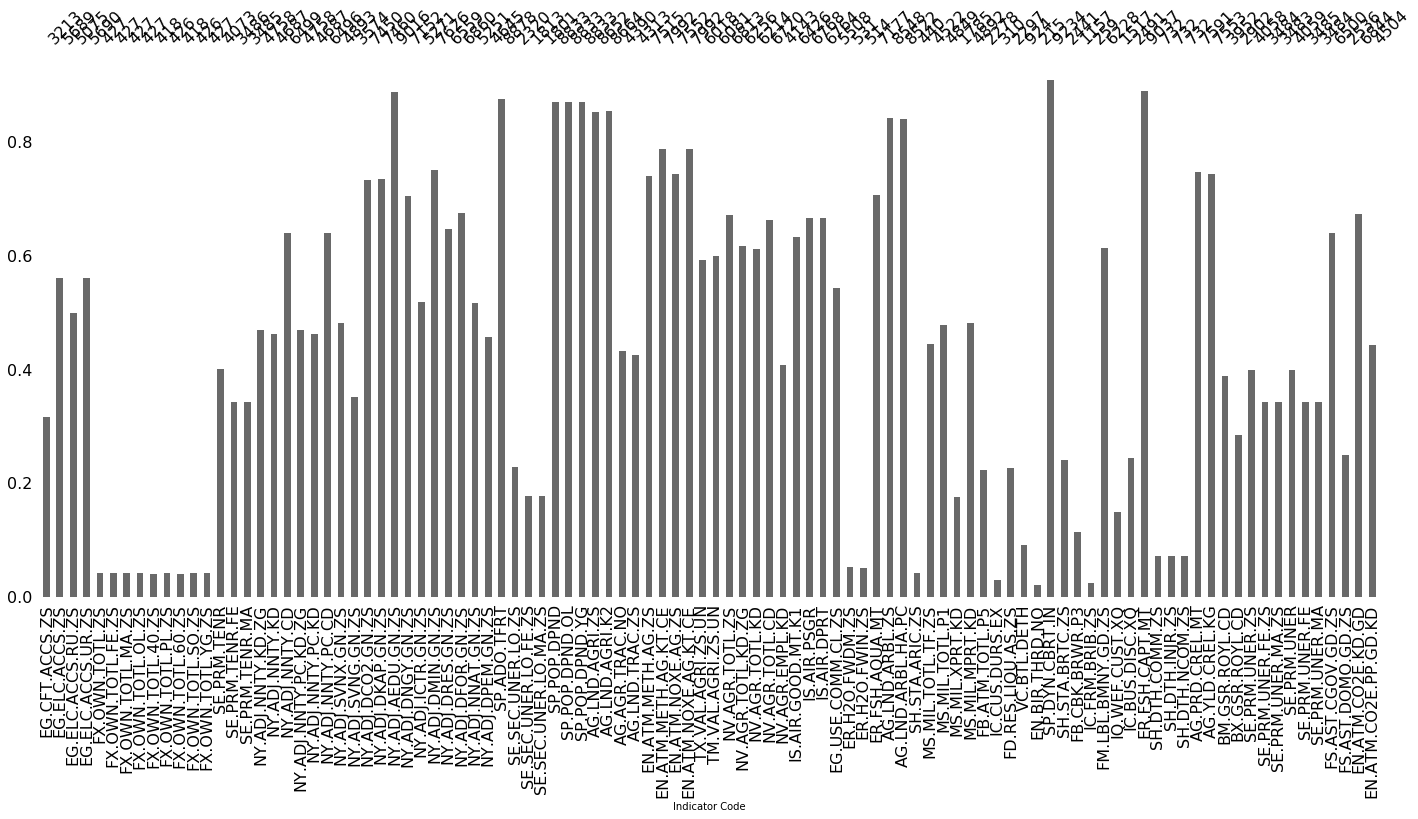

In [75]:
msno.bar(filtered_data.iloc[:,:100])

In [186]:
filtered_data.iloc[:,:10].shape

(10152, 10)

Another display of missing values in the first 100 indicators. White represents missing values: 

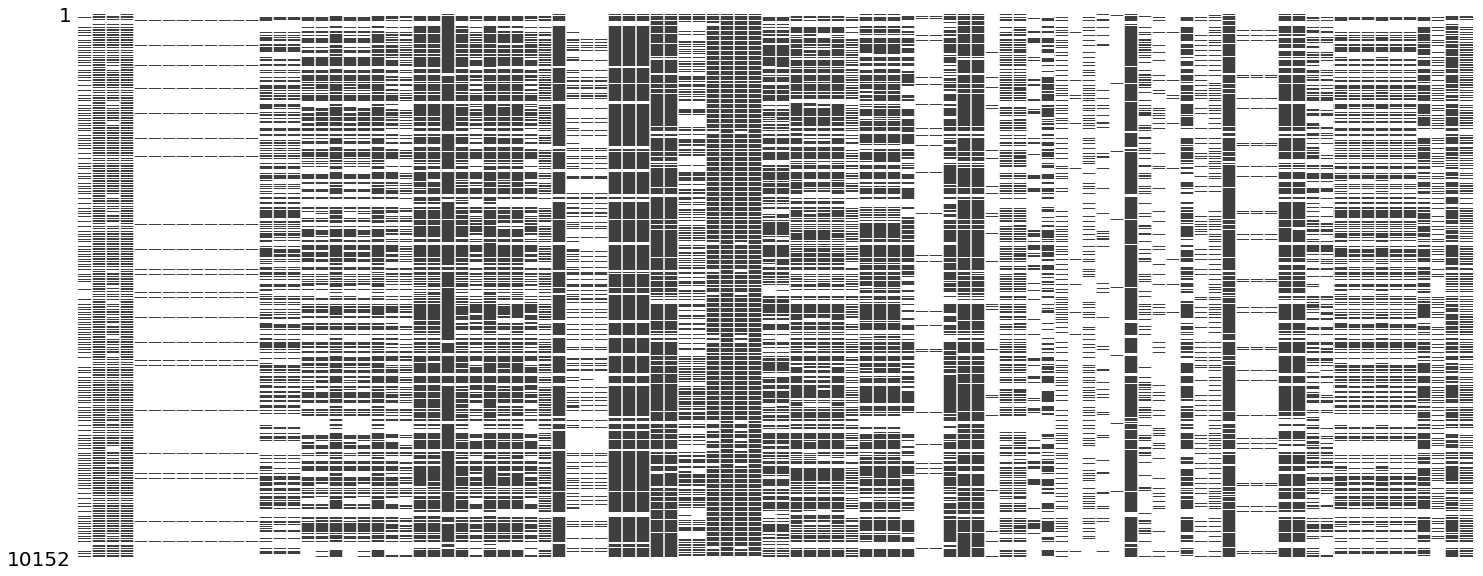

In [187]:
msno.matrix(filtered_data.iloc[:,:100], sparkline=False)

#### Invesigate the target variable SI.POV.DDAY

In [188]:
target_table = filtered_data['SI.POV.DDAY'].unstack(level='Country')

Here is a plot of the distribution of missing values. Time (from 1972 to 2015) runs from top to bottom. From left to right are all the countries in the dataset.

White represents missing data. It's pretty clear that we have a lot of our missing data for our target. This will affect the data that we can use for training (target needed for each training observation) and for test data (to measure error)

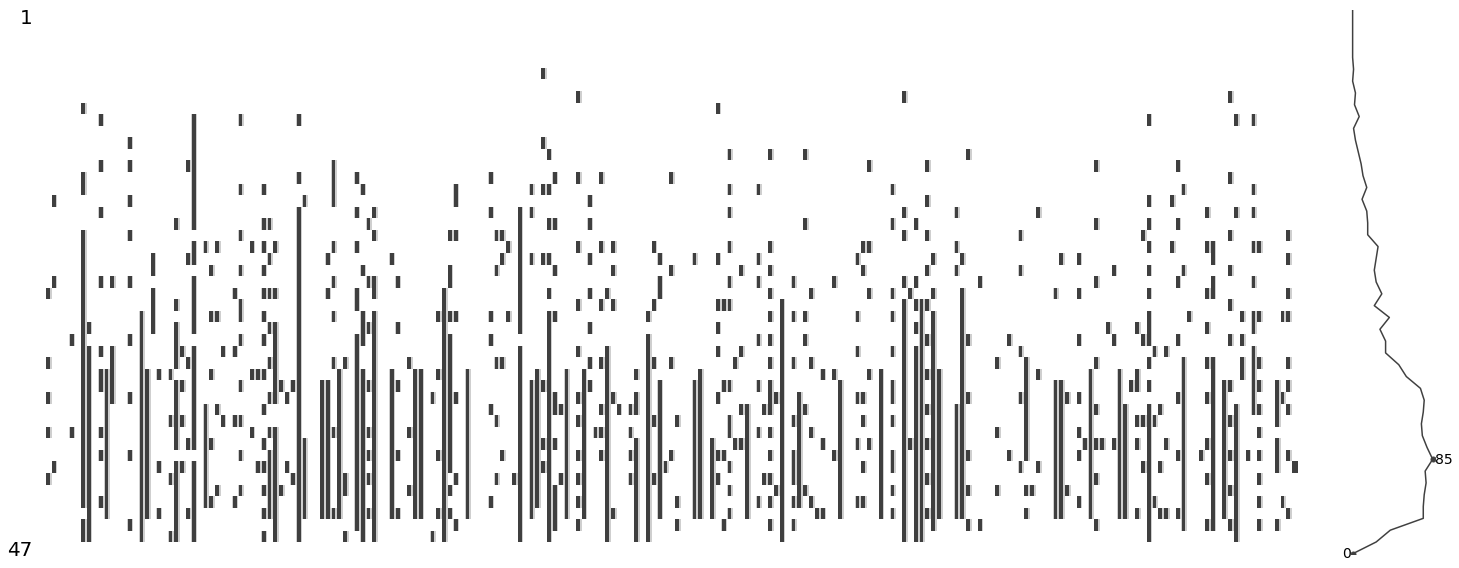

In [189]:
msno.matrix(target_table)

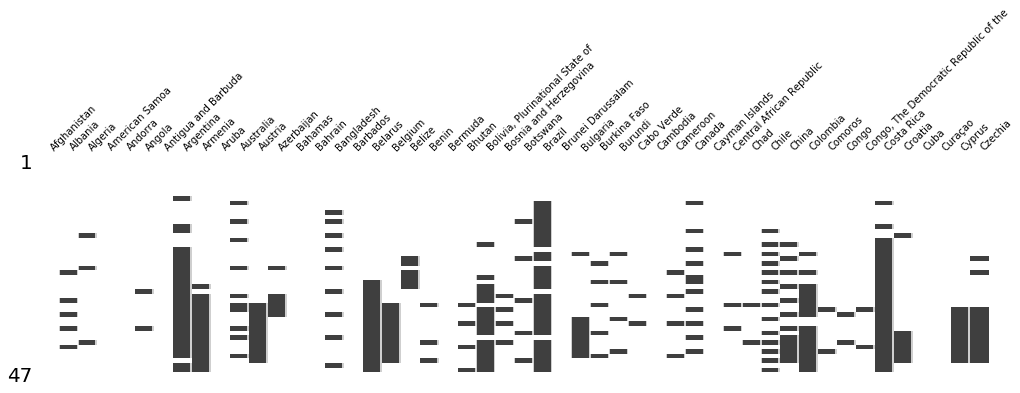

In [190]:
#A closer look at the first 50 countries
msno.matrix(target_table.iloc[:,:50], filter='bottom', sparkline=False, figsize=(17,4), fontsize=10)

### Remove countries without required target data

For this study, we attempt to predict the target for all countries except:

1. Those that do not have a target variable present for the target year, 2010. We drop these as we are unable to evaluate predicted value against actual value without them  
2. Those that do not have any record of SI.POV.DDAY before the target year (i.e. 2010 is the first year that the SI.POV.DDAY indicator was recorded for the country).   
*(Are we missing a trick here? Could these be considered the acid test for our forecaster or do they represent a separate category of problem whereby a separate model would be tuned to optimise for new cases without past values of the target?)* 
 

In [10]:
#For every country in the filtered_data
for country in filtered_data.index.levels[0]:
    if np.isnan(filtered_data.loc[(country,str(target_year)), target]):
        filtered_data.drop(country,level=0, inplace=True)

#Remove from the index as well        
filtered_data.index = filtered_data.index.remove_unused_levels()     

print("After removing countries that have no target variable for the target year we are left with", \
      len(filtered_data.index.levels[0]), "countries")

After removing countries that have no target variable for the target year we are left with 85 countries


Now remove those that do not have any record of SI.POV.DDAY before the target year. 

In [11]:
for country in filtered_data.index.levels[0]:
    if np.all(np.isnan(filtered_data.loc[(country):(country,str(target_year-1)), target])):
        print(country)
        filtered_data.drop(country,level=0, inplace=True)

#Remove from the index as well
filtered_data.index = filtered_data.index.remove_unused_levels() 

print("After removing countries that have no historical data for the target we are left with", \
      len(filtered_data.index.levels[0]), "countries")

Tuvalu
Vanuatu
After removing countries that have no historical data for the target we are left with 83 countries


### Remove Indicators with 50% or more missing data

We remove indicator columns that have a lot of Nan values. 

In [12]:
filtered_data.shape

(3901, 1594)

In [13]:
mostly_nan_columns = []

for col in filtered_data.columns.drop(target):
    if filtered_data[col].isna().sum()/filtered_data.shape[0] > 0.5:
            mostly_nan_columns.append(col)
        
filtered_data = filtered_data.drop(mostly_nan_columns, axis=1)        
        
print("We will now remove", len(mostly_nan_columns),"columns that are deemed to be too sparse")

We will now remove 774 columns that are deemed to be too sparse


#### Another look at missing data

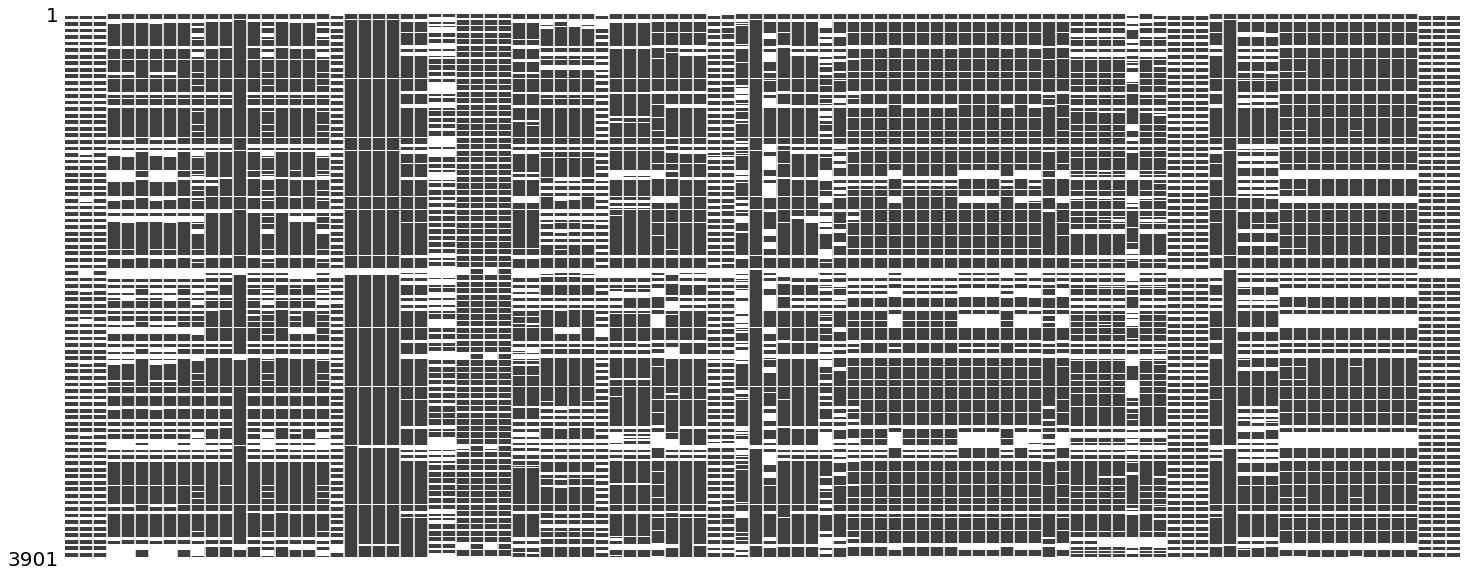

In [14]:
msno.matrix(filtered_data.iloc[:,:100], sparkline=False)

In [62]:
plot_data.columns

Int64Index([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018],
           dtype='int64', name='Year')

ValueError: Could not interpret input 'Year'

#### Format into Tableau friendly format

In [31]:
#Data for Indicator plots 
tableau_data = filtered_data.stack().reset_index()

In [49]:
#Data for creating a map of the world displaying the target indicator for 2010

#Create a series with country as index
tableau_target_map = pd.Series(index = filtered_data.index.levels[0])

idx = pd.IndexSlice
tableau_target_map[:] = filtered_data.loc[idx[:,str(target_year)],target].values
#Move the country into a column
tableau_target_map2 = tableau_target_map.reset_index()

### Write Files to disk

In [50]:
filtered_data.to_pickle(data_dir + pickle_out_file)
tableau_data.to_csv(data_dir + tableau_out_file)
tableau_target_map.to_csv(data_dir + tableau_map_out_file)

C:\Users\Fergus\.conda\envs\sdgs-env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
